# Исследование объявлений о продаже квартир

**Цель проекта** - определить параметры, которые влияют на рыночную стоимость квартиры в Санкт-Петербурге и соседних населённых пунктах на основе данных из сервиса Яндекс.Недвижимость. 

## План выполнения работы:
* Изучение имеющихся данных в датасете
* Нахождение и обработка пропущенных значений в датасете
* Приведение данных внутри датасета к нужным типам
* Подсчет и добавление в таблицу требующихся для анализа данных 
* Изучение таких параметров, как площадь, цена, число комнат, высота потолков и построение графиков по ним
* Корректировка датасета в результате анализа выбивающихся значений 
* Анализ факторов, которые влияют на стоимость объектов недвижимости по всему датасету
* Выделение квартир в центре Питера и исследование факторов, которые влияют на стоимость недвижимости в очерченном периметре
* Сравнение факторов влияющих на стоимость квартиры в рамках Питера и центра Питера
* Общий вывод

### Импорт бибилиотек и изучение общей информации 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data_realty = pd.read_csv('real_estate_data.csv', sep = '\t')
display(data_realty)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Мы открыли файл и убедились, что данные соответствуют описанию из задания, где:  

- **total_images** — число фотографий квартиры в объявлении
- **last_price** — цена на момент снятия с публикации
- **total_area** — площадь квартиры в квадратных метрах (м²)
- **first_day_exposition** — дата публикации
- **rooms** — число комнат
- **ceiling_height** — высота потолков (м)
- **floors_total** — всего этажей в доме
- **living_area** — жилая площадь в квадратных метрах(м²)
- **floor** — этаж
- **is_apartment** — апартаменты (булев тип)
- **open_plan** — свободная планировка (булев тип)
- **studio** — квартира-студия (булев тип)
- **kitchen_area** — площадь кухни в квадратных метрах (м²)
- **balcony** — число балконов
- **locality_name** — название населённого пункта
- **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)
- **cityCenters_nearest** — расстояние до центра города (м)
- **parks_around3000** — число парков в радиусе 3 км
- **parks_nearest** — расстояние до ближайшего парка (м)
- **ponds_around3000** — число водоёмов в радиусе 3 км
- **ponds_nearest** — расстояние до ближайшего водоёма (м)
- **days_exposition** — сколько дней было размещено объявление (от публикации до снятия)

In [2]:
data_realty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

Выполним более полный взгляд на таблицу. Видим, что у нас есть пропущенные значения в следующих столбцах: 

- **Ceiling height/Высота потолков** - Проблемы с пропущенными значениями в данном столбце могут быть связаны с тем, что человек, оформлявший объявление, просто не знает эту высоту или посчитал, что это неважно. 
- **Living_area/Площадь жилой зоны**  - Пропуски в значениях данного столбца могут быть вызваны тем, что продавец не знает, как высчитать жилую зону своей квартиры или не имеет на руках выписки из кадастрового реестра, где обычно это прописывается. 
- **Kitchen_area/Площадь кухни** - Пропуски в данном столбце скорее всего тоже возникли из-за того, что продавец не знает точной площади и, возможно, не имеет кадастровой выписки. 
- В стобцах **is_apartment** и **balkony** - пропущенные значения наиболее вероятно вызваны тем, что сам вопрос о них в анкете для заполнения объявления поставлен некорректно. Если форма предполагает, что можно заполнять данные или пропускать их, то скорее всего все заполненные значения - это "да", а пропущенные как раз "нет". На "нет" мы потом и заменим пропуски в этих двух столбцах. 
- В столбцах, относящихся к местоположению, а именно **parks_around3000** и **ponds_around3000**, пропуски могли быть вызваны тем, что квартира попросту не находится рядом с парком или с прудом в заданном радиусе. 
- В столбцах, отражающую иную категорию местоположения, а именно **airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest**, пропуски скорее всего вызваны тем, что квартиры находятся далеко от вышеназванных объектов местности и система не видит смысла их заполнять. Это как заполнять насколько отдельно взятая квартира в Австрии находится ближе к морю - не имеет смысла. 


### Предобработка данных

In [3]:
print('Определяем точное количество пропущенных значений')
display(data_realty.isna().sum())

Определяем точное количество пропущенных значений


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Определили сколько всего значений пропущено, приступаем к их заполнению. 

Заменим в столбцах **is_apartment**, **balcony** пропущенные значения на "0", т.е. пропишем, что квартиры буквально НЕ апартаменты и БЕЗ балкона.

In [4]:
data_realty['is_apartment'] = data_realty['is_apartment'].fillna('0')
data_realty['balcony'] = data_realty['balcony'].fillna('0')

- Пропущенные значения в столбцах **parks_around3000** и **ponds_around3000** заменим просто на "0", то есть по факту будем считать, что в радиусе 3 км у этих квартир нет ни парков, ни прудов. **Эти данные всё равно не участвуют в дальнейшей аналитике**

In [5]:
data_realty['parks_around3000'] = data_realty['parks_around3000'].fillna('0')
data_realty['ponds_around3000'] = data_realty['ponds_around3000'].fillna('0')

Сложно сказать, почему появились пропуски в столбцах **locality_name** и **floors_total**. Видимо пользователи просто не захотели/случайно пропустили их заполнение. Так как они составляют всего 2% от всего датасета, то можно их удалить. Общей картины анализа они не поменяют. 

In [6]:
data_realty = data_realty.dropna(subset = ['locality_name']).reset_index()
data_realty = data_realty.dropna(subset = ['floors_total']).reset_index()

Заполним пропущенные данные в столбцах **kitchen_area** и **living_area** таким образом: так как кухни обычно имеют более стандартную планировку, чем жилая зона, то разброс погрешностей не будет таким большим. Поэтому 1) берём медиану по площади кухни и заполняем ей пропущенные значения в этом столбце 2) Из общей площади вычитаем площадь кухни и заполняем ей пропущенные значения в столбце **living_area**. Естественно мы не учитываем, что возможно в квартире есть определённый метраж санузлов, но по сравнению с площадью кухни или жилой зоны он не так велик, поэтому такой погрешностью можно пренебречь.

In [7]:
#создадим функцию, которая заполнит значения  в столбцах total_area,living_area, kitchen_area на основании уже имеющихся данных в этих столбцах
def count_area(row):
    total = row['total_area']
    living = row['living_area']
    kitchen = row['kitchen_area']
    if (total == 0) and (living > 0) and (kitchen > 0):
        return living + kitchen
    elif (total > 0) and (living == 0) and (kitchen > 0):
        return total - kitchen
    elif (total > 0) and (living > 0) and (kitchen == 0):
        return total - living

data_realty.loc[data_realty['total_area'].isna(),'total_area'] = data_realty.loc[data_realty['total_area'].isna()].apply(count_area,axis=1) 

#У нас заполняются не все столбцы в living_area and kitchen_area и в принципе эти параметры не участвуют в анализе. Но на всякий случай можно заменить пропуски в данных категориях, которые всё равно остались незаполненными, меданой. 

data_realty.loc[data_realty['kitchen_area'].isna(),'kitchen_area'] = data_realty.loc[data_realty['kitchen_area'].isna()].fillna(data_realty['kitchen_area'].median())
data_realty.loc[data_realty['living_area'].isna(),'living_area'] = data_realty.loc[data_realty['living_area'].isna()].fillna(data_realty['living_area'].median())

Приводим дату в столбце **first_day_exposition** в порядок.

In [8]:
data_realty['first_day_exposition'] = pd.to_datetime(data_realty['first_day_exposition'], format='%Y.%m.%d %H:%M:%S')

In [9]:
print('Проверка работы с пропущенными значениями')
print(data_realty.isna().sum())
#проверили, все хорошо
print('--------------------')
print('Количество дубликатов')
print(data_realty.duplicated().sum())


Проверка работы с пропущенными значениями
level_0                     0
index                       0
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64
--------------------
Количество дубликатов
0


Заменяем тип данных. 
На целые числа - количество этажей и балконов. На булев тип - квартира ли или апартаменты в объявлении. На дробные числа вместо объектов - данные о местоположении. 

In [10]:
data_realty['floors_total'] = data_realty['floors_total'].astype('int')
data_realty['balcony'] = data_realty['balcony'].astype('int')
data_realty['is_apartment'] = data_realty['is_apartment'].fillna('Fasle')
data_realty['is_apartment'] = data_realty['is_apartment'].astype('bool')
data_realty['airports_nearest'] = data_realty['airports_nearest'].astype('float')
data_realty['cityCenters_nearest'] = data_realty['cityCenters_nearest'].astype('float')
data_realty['parks_around3000'] = data_realty['parks_around3000'].astype('float')
data_realty['parks_nearest'] = data_realty['parks_nearest'].astype('float')
data_realty['ponds_around3000'] = data_realty['ponds_around3000'].astype('float')
data_realty['ponds_nearest'] = data_realty['ponds_nearest'].astype('float')

In [11]:
print('Проверим замену типа данных')
print(data_realty.info())

Проверим замену типа данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   level_0               23565 non-null  int64         
 1   index                 23565 non-null  int64         
 2   total_images          23565 non-null  int64         
 3   last_price            23565 non-null  float64       
 4   total_area            23565 non-null  float64       
 5   first_day_exposition  23565 non-null  datetime64[ns]
 6   rooms                 23565 non-null  int64         
 7   ceiling_height        14481 non-null  float64       
 8   floors_total          23565 non-null  int64         
 9   living_area           23565 non-null  float64       
 10  floor                 23565 non-null  int64         
 11  is_apartment          23565 non-null  bool          
 12  studio                23565 non-null  bool    

Взглянем на то, какие у нас значения в столбце с названием населённого пункта. 

In [12]:
data_realty['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Видим, что разное написание одних и тех же населённых пунктов могло вызвать дубликаты. Проведём унификацию. 

In [13]:
print('До приведения в порядок стобца locality_name: ', len(data_realty['locality_name'].unique()))
data_realty['locality_name'] = data_realty['locality_name'].str.lower()
data_realty['locality_name'] = data_realty['locality_name'].str.replace('ё','е')
data_realty['locality_name'] = data_realty['locality_name'].str.replace('поселок городского типа ','')
data_realty['locality_name'] = data_realty['locality_name'].str.replace('поселок ','')
data_realty['locality_name'] = data_realty['locality_name'].str.replace('городской поселок ','')
data_realty['locality_name'] = data_realty['locality_name'].str.replace('коттеджный поселок ','')
data_realty['locality_name'] = data_realty['locality_name'].str.replace('село ','')
data_realty['locality_name'] = data_realty['locality_name'].str.replace('садовое товарищество ','')
data_realty['locality_name'] = data_realty['locality_name'].str.replace('деревня ','')
print('После приведения в порядок стобца locality_name: ', len(data_realty['locality_name'].unique()))


До приведения в порядок стобца locality_name:  364
После приведения в порядок стобца locality_name:  317


Так увидели, что обычной заменой значений мы избавились от дублирующихся значений. 

 Заполним пропуски в столбиках местоположения там, где это возможно, на основании населённого пункта. 

In [14]:
an_medians = data_realty.groupby('locality_name')['airports_nearest'].median()
for locality in an_medians.index:
    data_realty.loc[(data_realty['locality_name'] == locality), 'airports_nearest'] = data_realty.loc[data_realty['locality_name'] == locality, 'airports_nearest'].fillna(an_medians[locality])

p_medians = data_realty.groupby('locality_name')['parks_nearest'].median()
for locality in an_medians.index:
    data_realty.loc[(data_realty['locality_name'] == locality), 'parks_nearest'] = data_realty.loc[data_realty['locality_name'] == locality, 'parks_nearest'].fillna(p_medians[locality])    

pd_medians = data_realty.groupby('locality_name')['ponds_nearest'].median()
for locality in an_medians.index:
    data_realty.loc[(data_realty['locality_name'] == locality), 'ponds_nearest'] = data_realty.loc[data_realty['locality_name'] == locality, 'ponds_nearest'].fillna(pd_medians[locality])

cc_medians = data_realty.groupby('locality_name')['cityCenters_nearest'].median()
for locality in an_medians.index:
    data_realty.loc[(data_realty['locality_name'] == locality), 'cityCenters_nearest'] = data_realty.loc[data_realty['locality_name'] == locality, 'cityCenters_nearest'].fillna(cc_medians[locality])

In [15]:
data_realty['ceiling_height'].min
data_realty['ceiling_height'].max

<bound method Series.max of 0        2.70
1         NaN
2         NaN
3         NaN
4        3.03
         ... 
23560    3.70
23561     NaN
23562     NaN
23563    3.00
23564    2.50
Name: ceiling_height, Length: 23565, dtype: float64>

По данным из открытых источников, типичная высота потолков от 2,5 до 3,2 метров https://www.ivd.ru/stroitelstvo-i-remont/potolok/standartnaya-vysota-potolkov-v-kvartire-kakoj-ona-byvaet-i-kak-ee-izmenit-42011 
Из нашего анализа также видно, что потолки находятся в промежутке примерно между 2.50-3.70, поэтому пропущенные значения в данном столбце заменим медианой, **которая будет зависеть от типа населённого пункта. Так как строительство типовое, высота потолков в домах Петербурга не будет равнятся высоте потолков в каком-нибудь посёлке, поэтому данные будут аккуратнее** 

In [16]:
ceiling_height_medians = data_realty.groupby('locality_name')['ceiling_height'].median()

for locality in ceiling_height_medians.index:
    data_realty.loc[(data_realty['locality_name'] == locality), 'ceiling_height'] = data_realty.loc[data_realty['locality_name'] == locality, 'ceiling_height'].fillna(ceiling_height_medians[locality])

In [17]:
print('Проверка работы с пропущенными значениями')
print(data_realty.isna().sum())
#проверили, все хорошо

Проверка работы с пропущенными значениями
level_0                    0
index                      0
total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height           102
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5432
cityCenters_nearest     5432
parks_around3000           0
parks_nearest           5986
ponds_around3000           0
ponds_nearest           5517
days_exposition         3171
dtype: int64


Убрать все пропущенные значения не получилось, однако мы заменили их данными там, где это было возможно. В особенности в тех столбцах, которые критичны для анализа. 

### Добавление недостающих данных в таблицу

Добавим в таблицу необходимые атрибуты.

In [18]:
data_realty['price_pm'] = data_realty['last_price']/data_realty['total_area']
data_realty['weekday_sold'] = pd.DatetimeIndex(data_realty['first_day_exposition']).weekday
data_realty['month_sold'] = pd.DatetimeIndex(data_realty['first_day_exposition']).month
data_realty['year_sold'] = pd.DatetimeIndex(data_realty['first_day_exposition']).year    

Создадим функцию, чтобы промаркировать этажи. 

In [19]:
def floor_type(f):
    if f['floor'] == 1:
        return 'первый'
    if f['floor'] == f['floors_total']:
        return 'последний'
    else:
        return 'другой'

data_realty['floor_type'] = data_realty[['floor', 'floors_total']].apply(floor_type, axis = 1)


In [20]:
data_realty['living\total'] = data_realty['living_area'] / data_realty['total_area']
data_realty['kitchen\total'] = data_realty['kitchen_area'] / data_realty['total_area']

In [21]:
display(data_realty)

,level_0,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,...,ponds_around3000,ponds_nearest,days_exposition,price_pm,weekday_sold,month_sold,year_sold,floor_type,living\total,kitchen\total
0,0,0,20,13000000.0,108.00,2019-03-07,3,2.700,16,51.0,...,2.0,755.0,NaN,120370.370370,3,3,2019,другой,0.472222,0.231481
1,1,1,7,3350000.0,40.40,2018-12-04,1,2.615,11,18.6,...,0.0,584.5,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277
2,2,2,10,5196000.0,56.00,2015-08-20,2,2.700,5,34.3,...,2.0,574.0,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214
3,3,3,0,64900000.0,159.00,2015-07-24,3,2.700,14,30.0,...,3.0,234.0,424.0,408176.100629,4,7,2015,другой,0.188679,0.057233
4,4,4,2,10000000.0,100.00,2018-06-19,2,3.030,14,32.0,...,1.0,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23560,23645,23694,9,9700000.0,133.81,2017-03-21,3,3.700,5,73.3,...,3.0,381.0,NaN,72490.845228,1,3,2017,другой,0.547792,0.103356
23561,23646,23695,14,3100000.0,59.00,2018-01-15,3,2.500,5,38.0,...,0.0,NaN,45.0,52542.372881,0,1,2018,другой,0.644068,0.144068
23562,23647,23696,18,2500000.0,56.70,2018-02-11,2,NaN,3,29.7,...,0.0,NaN,NaN,44091.710758,6,2,2018,первый,0.523810,0.160494
23563,23648,23697,13,11475000.0,76.75,2017-03-28,2,3.000,17,30.0,...,3.0,196.0,602.0,149511.400651,1,3,2017,другой,0.390879,0.303583


### Проведение исследовательского анализа данных

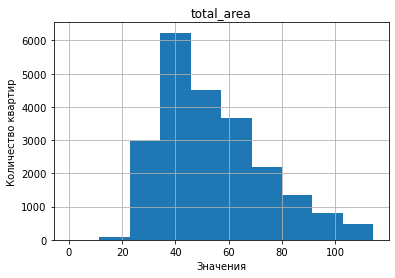

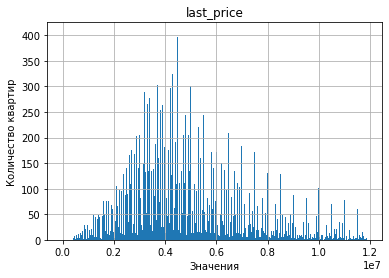

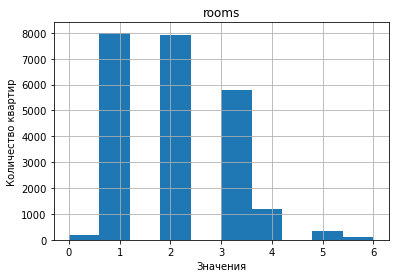

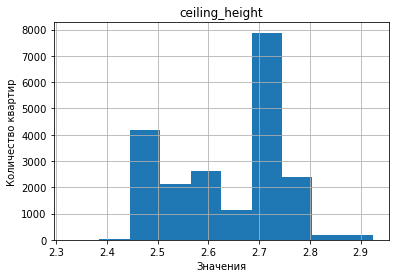

In [22]:
dict_for_auto = {
    'total_area' : [10,],
    'last_price' : [400,],
    'rooms': [10,],
    'ceiling_height': [10,]
}
 
for column in dict_for_auto.keys():
    quantiles = data_realty[column].quantile([0.25, 0.75])
    iqr = quantiles.iloc[1] - quantiles.iloc[0]
    data_realty[column].hist(bins = dict_for_auto[column][0], range = (max(0, quantiles.iloc[0] - 1.5 * iqr), quantiles.iloc[1] + 1.5 * iqr))
    plt.title(column)
    plt.ylabel('Количество квартир')
    plt.xlabel('Значения')
    plt.show()

- На первом графике видно, что площадь большинства квартир составляет от 30 до 50 метров квадратных
- На втором графике видно, что большинство квартир продаются по цене от 3 до 5 миллионов, что коррелирует со средней площадью квартир, приведённой на первом графике
- На третьем графике видно, что большинство квартир однокомнатные, двухкомнатные и трёхкомнатные, что логично, так как четырёхкомнатные квартиры встречаются нечасто в реальной жизни
- На четвёртом графике видно, что наиболее часто встречающася высота потолков - от 2,6 до 2,7 метров, что как мы выяснили, стандартное значение, когда заполняли пропуски в данной категории




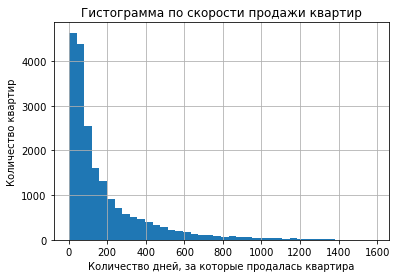

In [23]:
data_realty['days_exposition'].hist(bins=40)
plt.title('Гистограмма по скорости продажи квартир')
plt.ylabel('Количество квартир')
plt.xlabel('Количество дней, за которые продалась квартира')
plt.show()

In [24]:
mean_sold = data_realty['days_exposition'].mean()
median_sold = data_realty['days_exposition'].median()
print('Среднее время продажи квартиры {:.0f} день'.format(mean_sold))
print('Медиана времени продажи квартиры {:.0f} дней'.format(median_sold))

Среднее время продажи квартиры 181 день
Медиана времени продажи квартиры 95 дней


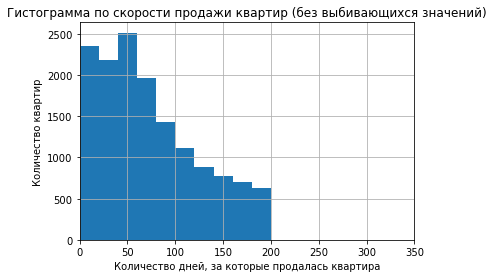

In [25]:
data_realty['days_exposition'].hist(bins=10, range=(0, 200))
plt.xlim(0, 350)
plt.title('Гистограмма по скорости продажи квартир (без выбивающихся значений)')
plt.ylabel('Количество квартир')
plt.xlabel('Количество дней, за которые продалась квартира')
plt.show()

На данном графике мы убедились, что брать среднее в таких вопросах - некорректно, медиана лучше показывает обстановку, но если говорить более точно, то все-таки большиство квартир продается за 50 дней


Выведем диаграммы с усами, чтобы убрать в дальнешем выбивающиеся значения

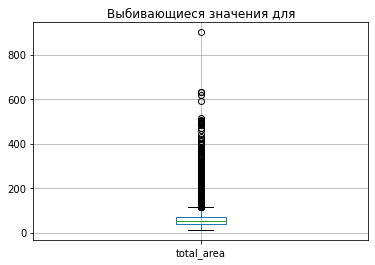

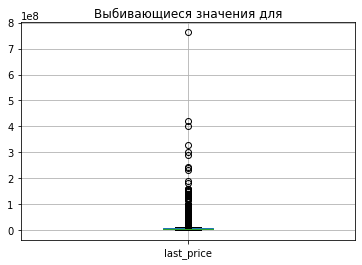

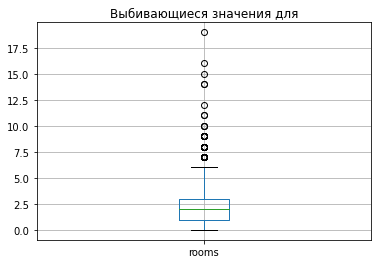

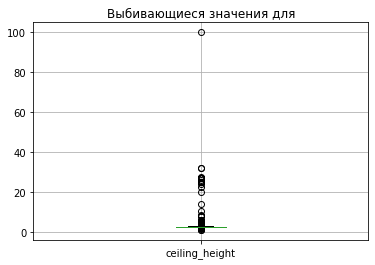

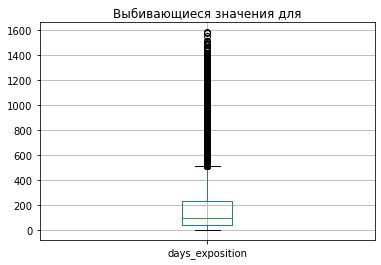

In [26]:
for column in ['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']:
    data_realty.boxplot(column)
    plt.title('Выбивающиеся значения для')
    plt.show()

Уберём выбивающиеся значения из датасета

In [27]:
data_realty['total_area'] = data_realty.query('total_area > 20 and total_area < 120')['total_area']
data_realty['last_price'] = data_realty.query('last_price > 100000 and last_price < 40000000')['last_price'].astype(float)
data_realty['rooms'] = data_realty.query('rooms > 0 and rooms < 6')['rooms']
data_realty['ceiling_height'] = data_realty.query('ceiling_height > 2.25 and ceiling_height < 4')['ceiling_height']
data_realty['days_exposition'] = data_realty.query('days_exposition > 0 and days_exposition < 530')['days_exposition']

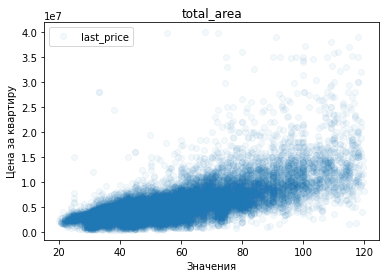

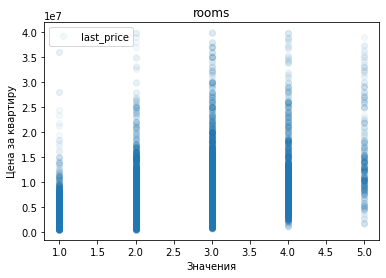

In [28]:
for column1 in ['total_area', 'rooms']:
    data_realty.sort_values('last_price').plot(x=column1, y='last_price', style='o', alpha=0.05, legend=True)
    plt.title(column1)
    plt.ylabel('Цена за квартиру')
    plt.xlabel('Значения')
    plt.show()

- На первом графике видно, что чем больше метраж, то тем больше цена за квартиру. Т.е. зависимость можно назвать линейной. 
- На втором графике можно увидеть, что по мере роста числа комнат цена также увеличивается, но есть такие двушки и трёшки, цена которых также значительна. Возможно, это квартиры с очень хорошим ремонтом или в очень выгодных местах.

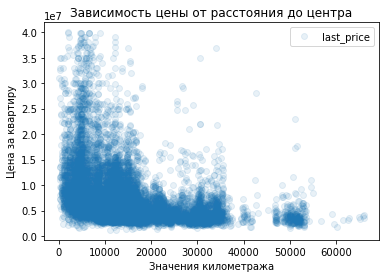

In [29]:
data_realty.sort_values('last_price').plot(x='cityCenters_nearest', y='last_price', style='o', alpha=0.1, legend=True)
plt.title('Зависимость цены от расстояния до центра')
plt.ylabel('Цена за квартиру')
plt.xlabel('Значения километража')
plt.show()
plt.show()

На данном графике видно, что чем ближе квартира к центру города, то тем выше её цена 

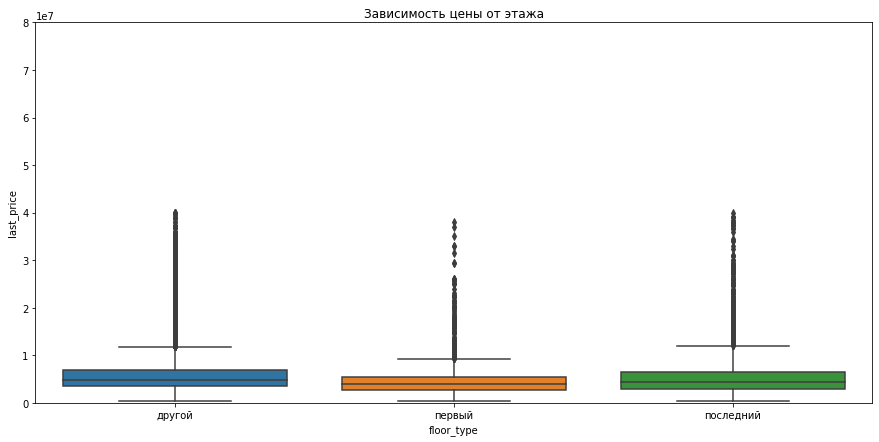

In [30]:
plt.figure(figsize = (15,7))
floor_plot = sns.boxplot(x='floor_type', y='last_price', data=data_realty)
floor_plot.set_ylim([0, 80_000_000])
plt.title('Зависимость цены от этажа')
plt.show()

На вышеприведенном графике видно, что цены на квартиры на первом и последнем этажах ниже, чем на остальных. Это логично, потому что на первом этаже зачастую есть проблемы с посторонними за окном, канализацией, холодными полами, а на последнем этаже может протекать крыша. 

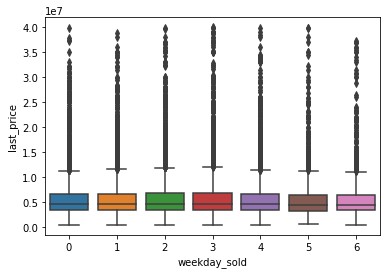

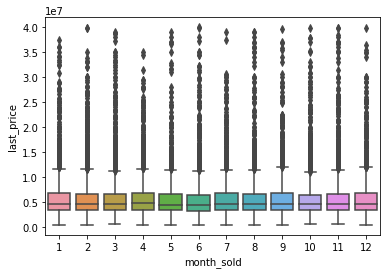

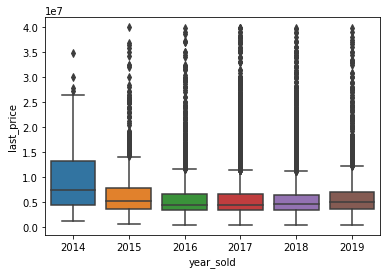

In [31]:
for column2 in ['weekday_sold', 'month_sold', 'year_sold']:
    day_plot = sns.boxplot(x=column2, y='last_price', data=data_realty)
    plt.show()

Из вышеприведённых графиков видно, что: 
- На графике по месяцам видно, что в январе, марте, апреле и в августе самые большие цены. Это объяснимо, потому что пик продаж в недвижимости обычно приходится на время после НГ и до 1-ого сентября. Это две ключевые даты, когда люди готовы активно менять жильё (после каникул). 
- На графике по годам видно, что пик цен на недвижимость был в 2014 году. Возможно люди решили вкладываться в что-то стабильное, чем и является недвижимость во время кризиса. Далее цены пошли на спад, видимо из-за того, что кризисная ситуация нормализировалась. 

**Приведём числовую корреляцию**

In [32]:
display(data_realty.corr())

,level_0,index,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_pm,weekday_sold,month_sold,year_sold,living\total,kitchen\total
level_0,1.000000,1.000000,0.002513,-0.007347,-0.004574,-0.007876,-0.009060,-0.003977,-0.007245,-0.001418,...,0.005823,0.003092,-0.015167,0.007194,-0.004023,0.007225,-0.007409,0.008310,0.004519,0.001920
index,1.000000,1.000000,0.002512,-0.007348,-0.004577,-0.007878,-0.009060,-0.003975,-0.007245,-0.001416,...,0.005824,0.003088,-0.015170,0.007194,-0.004024,0.007225,-0.007409,0.008310,0.004517,0.001920
total_images,0.002513,0.002512,1.000000,0.150666,0.124285,0.102273,0.045067,0.009822,0.106194,0.032781,...,-0.006640,0.011814,-0.005850,0.014896,0.133189,-0.009325,0.004486,0.139238,-0.025231,-0.045473
last_price,-0.007347,-0.007348,0.150666,1.000000,0.703656,0.475626,0.445252,0.048565,0.650419,0.062444,...,0.021892,0.296329,-0.081780,0.091410,0.669797,-0.012472,0.004994,-0.036630,-0.099156,-0.177832
total_area,-0.004574,-0.004577,0.124285,0.703656,1.000000,0.785857,0.314352,-0.024281,0.869996,-0.022031,...,0.018698,0.164680,-0.040308,0.111249,0.132702,-0.011565,0.007930,-0.063988,0.047582,-0.429625
rooms,-0.007876,-0.007878,0.102273,0.475626,0.785857,1.000000,0.199696,-0.213532,0.805186,-0.148905,...,-0.034858,0.109668,-0.036193,0.100665,0.026887,-0.001077,0.002824,-0.058921,0.305088,-0.622748
ceiling_height,-0.009060,-0.009060,0.045067,0.445252,0.314352,0.199696,1.000000,-0.025385,0.352206,-0.008755,...,-0.033816,0.231498,-0.087396,0.082105,0.320014,-0.021018,-0.002363,-0.061906,-0.056336,0.003976
floors_total,-0.003977,-0.003975,0.009822,0.048565,-0.024281,-0.213532,-0.025385,1.000000,-0.161984,0.678010,...,0.085462,-0.048689,0.050066,-0.052392,0.148423,0.012542,0.016909,0.007883,-0.276612,0.337711
living_area,-0.007245,-0.007245,0.106194,0.650419,0.869996,0.805186,0.352206,-0.161984,1.000000,-0.092357,...,-0.037436,0.176274,-0.061525,0.113525,0.213605,-0.007991,-0.001155,-0.072541,0.338399,-0.467752
floor,-0.001418,-0.001416,0.032781,0.062444,-0.022031,-0.148905,-0.008755,0.678010,-0.092357,1.000000,...,0.063288,-0.029711,0.033755,-0.039013,0.129203,0.011017,0.020736,0.005404,-0.203395,0.233815


**выводы по числовой корреляции** 

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

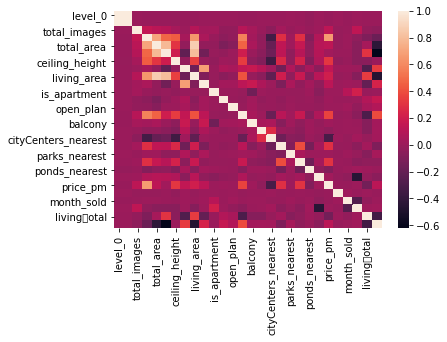

In [33]:
sns.heatmap(data_realty.corr())

Определим 10 самых популярных населённых пунктов по количеству объявлений. 

Text(0, 0.5, 'Количество объявлений')

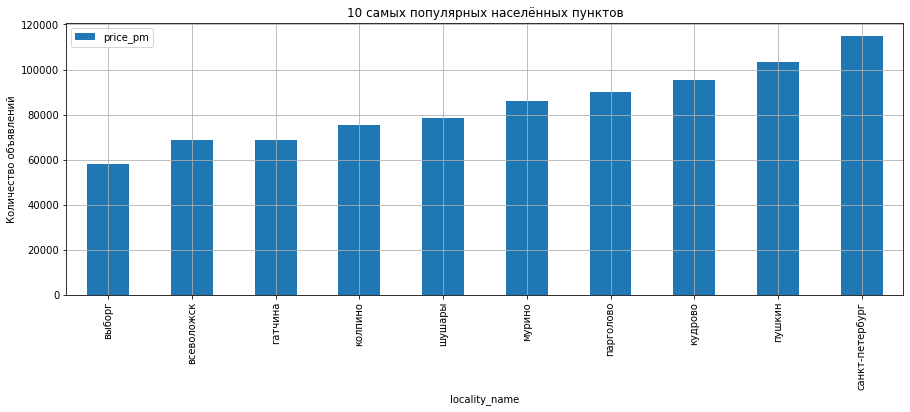

In [34]:
top10 = data_realty['locality_name'].value_counts().head(10)
data_realty.query('locality_name in @top10.index').pivot_table(index = 'locality_name', values = 'price_pm', aggfunc = 'mean').sort_values(by = 'price_pm').plot(kind = 'bar', figsize = (15,5), grid = True)
plt.title('10 самых популярных населённых пунктов')
plt.ylabel('Количество объявлений')

In [35]:
mean_metre_price = data_realty.query('locality_name in @top10.index').pivot_table(index='locality_name', values='price_pm', aggfunc='mean').sort_values(by='price_pm', ascending=False)
price_pm_max = mean_metre_price['price_pm'].max()
price_pm_min = mean_metre_price['price_pm'].min()
print('Город с самым большим кол-вом объявлений: {:.0f}'.format(price_pm_max))
print('Город с самым маленьким кол-вом объявлений: {:.0f}'.format(price_pm_min))
print('')

Город с самым большим кол-вом объявлений: 114869
Город с самым маленьким кол-вом объявлений: 58142



<ipython-input-36-d0a6baac6918>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb['spb_to_center'] = round(spb['cityCenters_nearest']/1000)


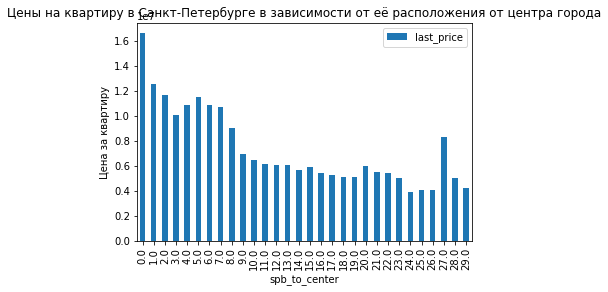

In [36]:
spb = data_realty.query('locality_name == "санкт-петербург"')
spb['spb_to_center'] = round(spb['cityCenters_nearest']/1000)
pricekm = spb.pivot_table(index='spb_to_center', values='last_price', aggfunc='mean').sort_values(by='spb_to_center').plot(y='last_price', kind='bar')
plt.title('Цены на квартиру в Санкт-Петербурге в зависимости от её расположения от центра города')
plt.ylabel('Цена за квартиру')
plt.show()

На данном графике видно, что резкое изменение цены происходит на восьми километрах от центральной точки города. Возьмем 8 км как границу между центром Питера и остальной его частью

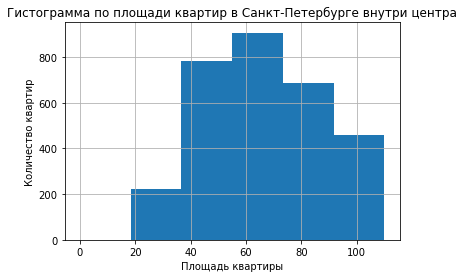

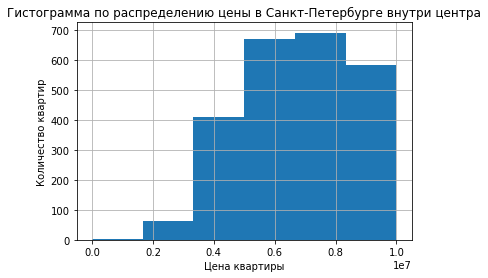

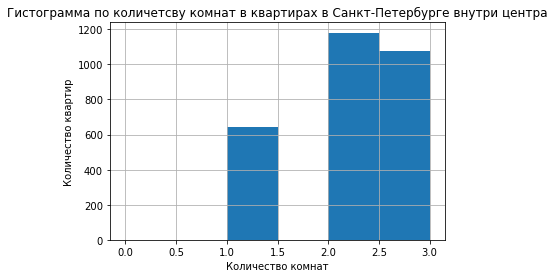

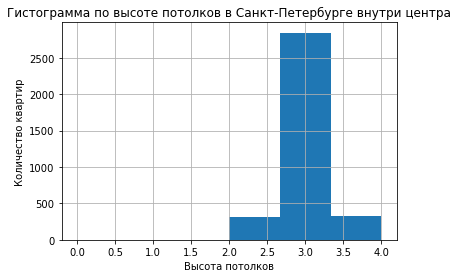

In [37]:
spb.query('spb_to_center <= 8 and last_price < 2e7 and total_area < 600').hist(column='total_area', range=(0, 110), bins=6)
plt.title('Гистограмма по площади квартир в Санкт-Петербурге внутри центра')
plt.ylabel('Количество квартир')
plt.xlabel('Площадь квартиры')
plt.show()

spb.query('spb_to_center <= 8 and last_price < 2e7').hist(column='last_price', range=(0.5, 1e7), bins=6)
plt.title('Гистограмма по распределению цены в Санкт-Петербурге внутри центра')
plt.ylabel('Количество квартир')
plt.xlabel('Цена квартиры')
plt.show()

spb.query('spb_to_center <= 8 and last_price < 2e7 and rooms < 10').hist(column='rooms', range=(0, 3), bins=6)
plt.title('Гистограмма по количетсву комнат в квартирах в Санкт-Петербурге внутри центра')
plt.ylabel('Количество квартир')
plt.xlabel('Количество комнат')
plt.show()

spb.query('spb_to_center <= 8 and last_price < 2e7 and ceiling_height < 30').hist(column='ceiling_height', range=(0, 4), bins=6)
plt.title('Гистограмма по высоте потолков в Санкт-Петербурге внутри центра')
plt.ylabel('Количество квартир')
plt.xlabel('Высота потолков')
plt.show()

- На первом графике видно, что большинство квартир в центре Питера имеют метраж от 40 до 70 метров
- На втором графике мы видим, что большинство квартир в центре Питера стоит от 5 до 8 миллионов рублей
- На третьем графике мы видим, что в центре Питера преобладают двухкомнатные квартиры
- На четвёртом графике мы видим, что высота потолков в центре города находится в периметре от 2.7 метров до 3.3, что не удивительно. Старые дома строили с более высокими потолками, а так как центр Питера скорее всего имеет старый жилой фонд, то такая высота потолков вполне объяснима

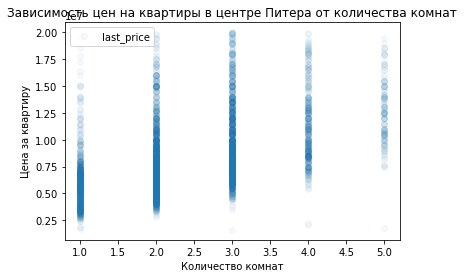

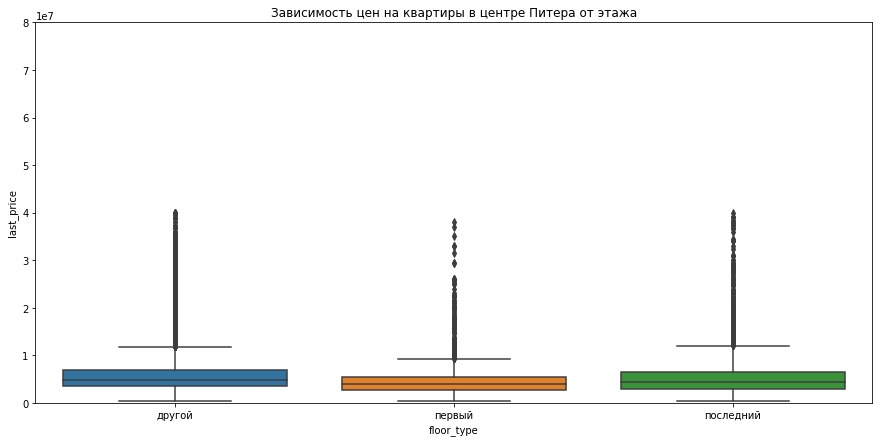

<Figure size 1080x504 with 0 Axes>

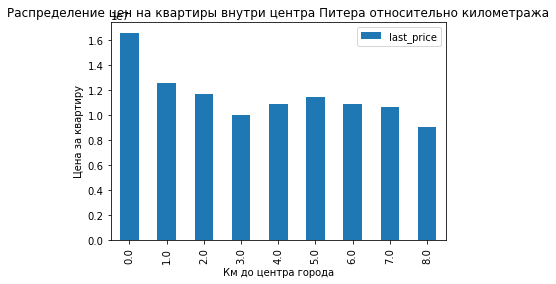

In [38]:

spb.query('spb_to_center <= 8 and last_price < 2e7 and rooms < 10').sort_values('last_price').plot(x='rooms', y='last_price', style='o', alpha=0.04, legend=True)
plt.title('Зависимость цен на квартиры в центре Питера от количества комнат')
plt.ylabel('Цена за квартиру')
plt.xlabel('Количество комнат')
plt.show()
plt.figure(figsize = (15,7))

spb_center = spb.query('spb_to_center <= 8 and last_price < 2e7').sort_values('last_price')
floor_plot_spb = sns.boxplot(x='floor_type', y='last_price', data=data_realty)
floor_plot_spb.set_ylim([0, 80_000_000])
plt.title('Зависимость цен на квартиры в центре Питера от этажа')
plt.show()
plt.figure(figsize = (15,7))

spb.query('last_price < 1e8 and spb_to_center <= 8').pivot_table(index='spb_to_center', values='last_price', aggfunc='mean').sort_values(by='spb_to_center').plot(y='last_price', kind='bar')
plt.ylabel('Цена за квартиру')
plt.xlabel('Км до центра города')
plt.title('Распределение цен на квартиры внутри центра Питера относительно километража')
plt.show()

- На первом графике можно заметить такую же линейную зависимость, как и на изначальном датасете, т.е. чем больше комнат - тем выше цена
- На втором графике так же не поменялась логика, люди в центре Питера не стремятся выкладывать дополнительные деньги за первый или последний этажи
- На третьем графике видно, что квартиры в самом центре стоят на порядок выше квартир, находящихся в небольшом отдалении. Что логично. Чем дальше от центра - тем ниже цена

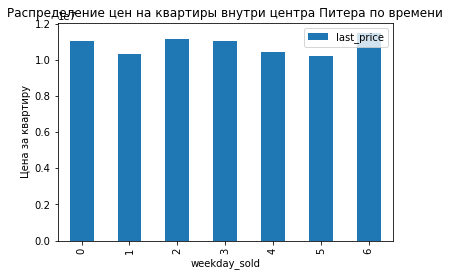

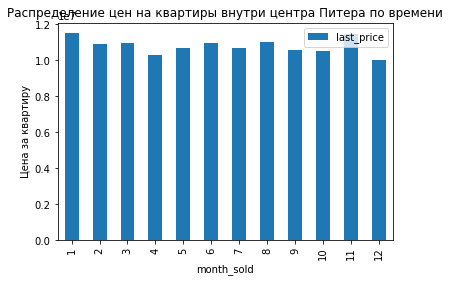

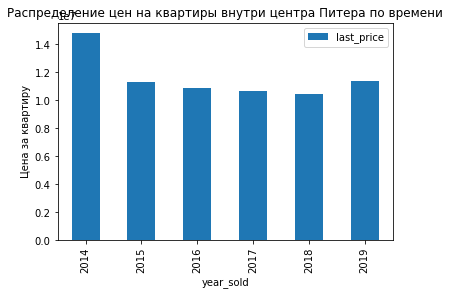

In [39]:
for column3 in ['weekday_sold', 'month_sold', 'year_sold']:
    spb.query('spb_to_center <= 8').pivot_table(index=column3, values='last_price', aggfunc='mean').sort_values(by=column3).plot(y='last_price', kind='bar')
    plt.title('Распределение цен на квартиры внутри центра Питера по времени')
    plt.ylabel('Цена за квартиру')
    plt.show()

* На первом графике видно, что как и в других городах, суббота - это тот день, когда люди готовы покупать дорогие квартиры, видимо из-за того, что у них больше времени принять решение о такой значительной покупке. 
* На втором графике видно, что цены в центре возрастают каждые 3 месяца. Можно предположить, что это связанно с сезонностью на данном рынке. 
* На третьем графике видно, что в 2014 году цены на недвижимость были крайне высоки, причиной которым скорее всего был валютный кризис. Далее пошло снижение и к 2019 году цена нормализовалась.

In [40]:
correlation = spb[['last_price', 'rooms', 'floor_type', 'spb_to_center', 'weekday_sold', 'month_sold', 'year_sold']]
display(correlation.corr())

,last_price,rooms,spb_to_center,weekday_sold,month_sold,year_sold
last_price,1.000000,0.505681,-0.404831,-0.006403,-0.001423,-0.032440
rooms,0.505681,1.000000,-0.264303,-0.003639,0.000975,-0.069502
spb_to_center,-0.404831,-0.264303,1.000000,0.000129,0.007046,0.085103
weekday_sold,-0.006403,-0.003639,0.000129,1.000000,0.003689,-0.001939
month_sold,-0.001423,0.000975,0.007046,0.003689,1.000000,-0.278403
year_sold,-0.032440,-0.069502,0.085103,-0.001939,-0.278403,1.000000


Cудя по коэффициенту корреляции Пирсона, больше всего на цену квартир в Питере влияет количество комнат. 

### Общий вывод

На рыночную стоимость объектов недвижимости влияют следующие параметры:
* **Количество комнат** - чем больше комнат, тем выше цена. Но этот тренд актуален в большей степени для однокомнатных, двухкомнатных и трёхкомнатных квартир. Начиная от 4 комнат корреляция не такая сильная. 
* **Метраж квартиры** - чем выше метраж квартиры, тем выше цена
* **Расположение квартиры** - чем ближе к центру она находится, тем она дороже
* **Этаж** - квартиры на первых и последних этажах стоят ниже, чем на остальных 
* **Экономическая ситуация в стране** - когда в стране кризис, как например в 2014 году, тогда квартиры стоят дороже. 
* **Сезонность** - выше цены после Нового Года (январь) и в конце августа-начале сентября, а ниже - в феврале/октябре
* **День недели** - цены по субботам обычно выше среднего, видимо в субботу у людей есть гораздо больше времени принять взвешенное решение о дорогой покупке.

Так же было выяснено, что: 
* Размер потолков не играет большой роли в ценообразовании на квартиры.
* Обычно квартиры продаются за 3 месяца. Быстрой можно считать продажу за 1,5-2 месяца. 